# This is my first idea for going towards the hybrid architecture that I am looking to achieve. So, according to this idea, I am going to check if it works on the MNITS dataset or not.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow

I start with the usual utility cells for this task

In [1]:
# packages used for machine learning
import tensorflow as tf

# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# import pandas for reading the csv files
import pandas as pd

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '../..'])

Data
LICENSE
Literature_survey
Models
README.md
Scripts



In [4]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../../Data" # the data path

dataset = "MNIST"

data_files = {
    'train': os.path.join(data_path, dataset, "train.csv"),
    'test' : os.path.join(data_path, dataset, "test.csv")
}

base_model_path = '../../Models'

current_model_path = os.path.join(base_model_path, "IDEA_1")

model_path_name = os.path.join(current_model_path, "Model5")

# constant values:
highest_pixel_value = 255
train_percentage = 95
num_classes = 10
no_of_epochs = 500
batch_size = 64
hidden_neurons = 1024

# Let's load in the data:
-------------------------------------------------------------------------------------------------------------------
## and perform some basic preprocessing on it

In [5]:
raw_data = pd.read_csv(data_files['train'])

In [6]:
n_features = len(raw_data.columns) - 1
n_examples = len(raw_data.label)
print n_features, n_examples

784 42000


In [7]:
raw_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
labels = np.array(raw_data['label'])

In [9]:
labels.shape

(42000,)

In [10]:
# extract the data from the remaining raw_data
features = np.ndarray((n_features, n_examples), dtype=np.float32)

count = 0 # initialize from zero
for pixel in raw_data.columns[1:]:
    feature_slice = np.array(raw_data[pixel])
    features[count, :] = feature_slice
    count += 1 # increment count

In [11]:
features.shape

(784, 42000)

In [12]:
# normalize the pixel data by dividing the values by the highest_pixel_value
features = features / highest_pixel_value

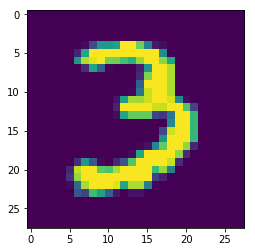

In [13]:
plt.imshow((features[:, 9]).reshape((28, 28)))

# use the function to generate the train_dev split
-------------------------------------------------------------------------------------------------------------------
link -> https://github.com/akanimax/machine-learning-helpers/blob/master/training/data_setup.py

In [14]:
# shuffle the data using a random permutation
perm = np.random.permutation(n_examples)
features = features[:, perm]
labels = labels[perm]

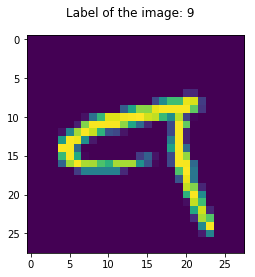

In [15]:
random_index = np.random.randint(n_examples)
random_image = features[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(labels[random_index]))
plt.imshow(random_image)

In [16]:
# function to split the data into train - dev sets:
def split_train_dev(X, Y, train_percentage):
    '''
        function to split the given data into two small datasets (train - dev)
        @param
        X, Y => the data to be split
        (** Make sure the train dimension is the first one)
        train_percentage => the percentage which should be in the training set.
        (**this should be in 100% not decimal)
        @return => train_X, train_Y, test_X, test_Y
    '''
    m_examples = len(X)
    assert train_percentage < 100, "Train percentage cannot be greater than 100! NOOB!"
    partition_point = int((m_examples * (float(train_percentage) / 100)) + 0.5) # 0.5 is added for rounding

    # construct the train_X, train_Y, test_X, test_Y sets:
    train_X = X[: partition_point]; train_Y = Y[: partition_point]
    test_X  = X[partition_point: ]; test_Y  = Y[partition_point: ]

    assert len(train_X) + len(test_X) == m_examples, "Something wrong in X splitting"
    assert len(train_Y) + len(test_Y) == m_examples, "Something wrong in Y splitting"

    # return the constructed sets

    return train_X, train_Y, test_X, test_Y

In [17]:
train_X, train_Y, test_X, test_Y = split_train_dev(features.T, labels, train_percentage)

In [18]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [19]:
train_X = train_X.T; test_X = test_X.T
train_X.shape, test_X.shape

((784, 39900), (784, 2100))

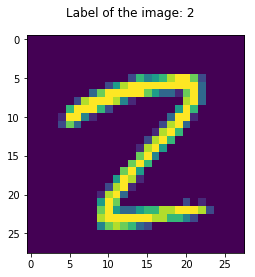

In [20]:
# check by plotting some image
random_index = np.random.randint(train_X.shape[-1])
random_image = train_X[:, random_index].reshape((28, 28))
# use plt to plot the image
plt.figure().suptitle("Label of the image: " + str(train_Y[random_index]))
plt.imshow(random_image)

# Point to reset from here onwards: 

In [21]:
# defining the Tensorflow graph for this task:
tf.reset_default_graph() # reset the graph here:

In [22]:
# define the placeholders:
tf_input_pixels = tf.placeholder(tf.float32, shape=(n_features, None))
tf_integer_labels = tf.placeholder(tf.int32, shape=(None,))

In [23]:
# image shaped pixels for the input_pixels:
tf_input_images = tf.reshape(tf.transpose(tf_input_pixels), shape=(-1, 28, 28, 1))
input_image_summary = tf.summary.image("input_image", tf_input_images)

In [24]:
# define the one hot encoded version fo the integer_labels
tf_one_hot_encoded_labels = tf.one_hot(tf_integer_labels, depth=num_classes, axis=0)
tf_one_hot_encoded_labels

<tf.Tensor 'one_hot:0' shape=(10, ?) dtype=float32>

In [25]:
# define the variables for the layers:
lay_0_b = tf.get_variable("layer_0_biases", shape=(n_features, 1), 
                          dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 1 weights 
lay_1_W = tf.get_variable("layer_1_weights", shape=(hidden_neurons, n_features), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_1_b = tf.get_variable("layer_1_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 2 weights
lay_2_W = tf.get_variable("layer_2_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_2_b = tf.get_variable("layer_2_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 3 weights
lay_3_W = tf.get_variable("layer_3_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_3_b = tf.get_variable("layer_3_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 4 weights
lay_4_W = tf.get_variable("layer_4_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_4_b = tf.get_variable("layer_4_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 5 weights
lay_5_W = tf.get_variable("layer_5_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_5_b = tf.get_variable("layer_5_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 6 weights
lay_6_W = tf.get_variable("layer_6_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_6_b = tf.get_variable("layer_6_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 7 weights 
lay_7_W = tf.get_variable("layer_7_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_7_b = tf.get_variable("layer_7_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 2 weights
lay_8_W = tf.get_variable("layer_8_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_8_b = tf.get_variable("layer_8_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 3 weights
lay_9_W = tf.get_variable("layer_9_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_9_b = tf.get_variable("layer_9_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 4 weights
lay_10_W = tf.get_variable("layer_10_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_10_b = tf.get_variable("layer_10_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 5 weights
lay_11_W = tf.get_variable("layer_11_weights", shape=(hidden_neurons, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_11_b = tf.get_variable("layer_11_biases", shape=(hidden_neurons, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# layer 6 weights
lay_12_W = tf.get_variable("layer_12_weights", shape=(num_classes, hidden_neurons), 
                              dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())
lay_12_b = tf.get_variable("layer_12_biases", shape=(num_classes, 1), 
                            dtype=tf.float32, initializer=tf.zeros_initializer())

# define the forward computation:

In [26]:
# forward computation:
z1 = tf.matmul(lay_1_W, tf_input_pixels) + lay_1_b
a1 = tf.nn.relu(z1)

z2 = tf.matmul(lay_2_W, a1) + lay_2_b
a2 = tf.nn.relu(z2)

z3 = tf.matmul(lay_3_W, a2) + lay_3_b
a3 = tf.nn.relu(z3) 

z4 = tf.matmul(lay_4_W, a3) + lay_4_b
a4 = tf.nn.relu(z4) 

z5 = tf.matmul(lay_5_W, a4) + lay_5_b
a5 = tf.nn.relu(z5) 

z6 = tf.matmul(lay_6_W, a5) + lay_6_b
a6 = tf.nn.relu(z6)

z7 = tf.matmul(lay_7_W, a6) + lay_7_b
a7 = tf.nn.relu(z7)

z8 = tf.matmul(lay_8_W, a7) + lay_8_b
a8 = tf.nn.relu(z8)

z9 = tf.matmul(lay_9_W, a8) + lay_9_b
a9 = tf.nn.relu(z9) 

z10 = tf.matmul(lay_10_W, a9) + lay_10_b
a10 = tf.nn.relu(z10) 

z11 = tf.matmul(lay_11_W, a10) + lay_11_b
a11 = tf.nn.relu(z11)

z12 = tf.matmul(lay_12_W, a11) + lay_12_b
a12 = tf.nn.relu(z12) # final activations

# define the backward computation:

In [27]:
# in the backward computations, there are no actiavtion functions
y_in_back = a12

a1_back = tf.abs(tf.matmul(tf.transpose(lay_12_W), y_in_back) + lay_11_b)
a2_back = tf.abs(tf.matmul(tf.transpose(lay_11_W), a1_back) + lay_10_b)
a3_back = tf.abs(tf.matmul(tf.transpose(lay_10_W), a2_back) + lay_9_b)
a4_back = tf.abs(tf.matmul(tf.transpose(lay_9_W), a3_back) + lay_8_b)
a5_back = tf.abs(tf.matmul(tf.transpose(lay_8_W), a4_back) + lay_7_b)
a6_back = tf.abs(tf.matmul(tf.transpose(lay_7_W), a5_back) + lay_6_b)
a7_back = tf.abs(tf.matmul(tf.transpose(lay_6_W), a6_back) + lay_5_b)
a8_back = tf.abs(tf.matmul(tf.transpose(lay_5_W), a7_back) + lay_4_b)
a9_back = tf.abs(tf.matmul(tf.transpose(lay_4_W), a8_back) + lay_3_b)
a10_back = tf.abs(tf.matmul(tf.transpose(lay_3_W), a9_back) + lay_2_b)
a11_back = tf.abs(tf.matmul(tf.transpose(lay_2_W), a10_back) + lay_1_b)
a12_back = tf.abs(tf.matmul(tf.transpose(lay_1_W), a11_back) + lay_0_b)

In [28]:
x_out_back = a12_back
x_out_back, tf_input_pixels

(<tf.Tensor 'Abs_11:0' shape=(784, ?) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(784, ?) dtype=float32>)

In [29]:
x_out_back_image = tf.reshape(tf.transpose(x_out_back), shape=(-1, 28, 28, 1))
output_image_summary = tf.summary.image("output_image", x_out_back_image)

# Now compute the forward cost

In [30]:
# forward cost 
fwd_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_in_back, labels=tf_one_hot_encoded_labels))
fwd_cost_summary = tf.summary.scalar("Forward_cost", fwd_cost)

# Now compute the backward cost

In [31]:
# backward cost 
# The backward cost is the mean squared error function
bwd_cost = tf.reduce_mean(tf.squared_difference(x_out_back, tf_input_pixels))
bwd_cost_summary = tf.summary.scalar("Backward_cost", bwd_cost)

# The final cost is the addition of both forward and the backward costs 

In [32]:
cost = fwd_cost + bwd_cost
final_cost_summary = tf.summary.scalar("Final_cost", cost)

In [33]:
# define an optimizer for this task
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
init = tf.global_variables_initializer()
all_summaries = tf.summary.merge_all()

In [34]:
n_train_examples = train_X.shape[-1]

In [35]:
sess = tf.InteractiveSession()
tensorboard_writer = tf.summary.FileWriter(model_path_name, graph=sess.graph, filename_suffix=".bot")

In [36]:
sess.run(init)

In [37]:
# start training the network for num_iterations and using the batch_size
global_step = 0
for epoch in range(no_of_epochs):
    global_index = 0; costs = [] # start with empty list
    while(global_index < n_train_examples):
        start = global_index; end = start + batch_size
        train_X_minibatch = train_X[:, start: end]
        train_Y_minibatch = train_Y.astype(np.int32)[start: end]

        iteration = global_index / batch_size
        
        # run the computation:
        _, loss = sess.run((optimizer, cost), feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})

        # add the cost to the cost list
        costs.append(loss)

        if(iteration % 100 == 0):
            sums = sess.run(all_summaries, feed_dict={tf_input_pixels: train_X_minibatch, 
                                                         tf_integer_labels: train_Y_minibatch})
            
            print "Iteration: " + str(global_step) + " Cost: " + str(loss)

            tensorboard_writer.add_summary(sums, global_step = global_step)
        
        # increment the global index 
        global_index = global_index + batch_size
    
        global_step += 1
        
    # print the average epoch cost:
    print "Average epoch cost: " + str(sum(costs) / len(costs))
        

Iteration: 0 Cost: 26.7371
Iteration: 100 Cost: 26.7084
Iteration: 200 Cost: 26.6973
Iteration: 300 Cost: 26.6894
Iteration: 400 Cost: 166.376
Iteration: 500 Cost: 9.07829e+10
Iteration: 600 Cost: 4.3897e+07
Average epoch cost: 27275825445.0
Iteration: 624 Cost: 1.704e+07
Iteration: 724 Cost: 1.49899e+06
Iteration: 824 Cost: 215821.0
Iteration: 924 Cost: 34630.9
Iteration: 1024 Cost: 5584.44
Iteration: 1124 Cost: 875.458
Iteration: 1224 Cost: 147.454
Average epoch cost: 1075608.7372
Iteration: 1248 Cost: 101.532
Iteration: 1348 Cost: 36.5088
Iteration: 1448 Cost: 27.9523
Iteration: 1548 Cost: 26.8686
Iteration: 1648 Cost: 26.726
Iteration: 1748 Cost: 26.7009
Iteration: 1848 Cost: 26.6902
Average epoch cost: 32.656726426
Iteration: 1872 Cost: 26.6931
Iteration: 1972 Cost: 26.6905
Iteration: 2072 Cost: 26.6863
Iteration: 2172 Cost: 26.6854
Iteration: 2272 Cost: 26.6844
Iteration: 2372 Cost: 26.6841
Iteration: 2472 Cost: 26.681
Average epoch cost: 26.6596201093
Iteration: 2496 Cost: 26.68

KeyboardInterrupt: 